In [94]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [70]:
# adjust dataframe view in ipnyb
pd.set_option('Display.max_colwidth', None)
pd.set_option('Display.max_columns', None)
pd.set_option('Display.width', None)

In [71]:
# load movie data into dataframe
df_raw = pd.read_csv(r'./movies.csv')
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [72]:
# identify the # missing values
for column in df_raw.columns:
    missing_values = df_raw[column].isna().sum()
    string_output = f"{column}: {missing_values}"
    print(string_output)

name: 0
rating: 77
genre: 0
year: 0
released: 2
score: 3
votes: 3
director: 0
writer: 3
star: 1
country: 3
budget: 2171
gross: 189
company: 17
runtime: 4


In [73]:
# budget is key for this analysis
# drop all NaN values
df_adj = df_raw.dropna()

# check missing values again with new df
for column in df_adj.columns:
    missing_values = df_adj[column].isna().sum()
    string_output = f"{column}: {missing_values}"
    print(string_output)

print(df_adj.info())

name: 0
rating: 0
genre: 0
year: 0
released: 0
score: 0
votes: 0
director: 0
writer: 0
star: 0
country: 0
budget: 0
gross: 0
company: 0
runtime: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB
None


In [74]:
# replace all object data types with coded values
df_coded = df_adj.copy()
for column in df_coded.columns:
    if df_coded[column].dtype == 'object':
        df_coded[column] = df_coded[column].astype('category')
        df_coded[column] = df_coded[column].cat.codes
        
print(df_coded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   int16  
 1   rating    5421 non-null   int8   
 2   genre     5421 non-null   int8   
 3   year      5421 non-null   int64  
 4   released  5421 non-null   int16  
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   int16  
 8   writer    5421 non-null   int16  
 9   star      5421 non-null   int16  
 10  country   5421 non-null   int8   
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   int16  
 14  runtime   5421 non-null   float64
dtypes: float64(5), int16(6), int64(1), int8(3)
memory usage: 375.9 KB
None


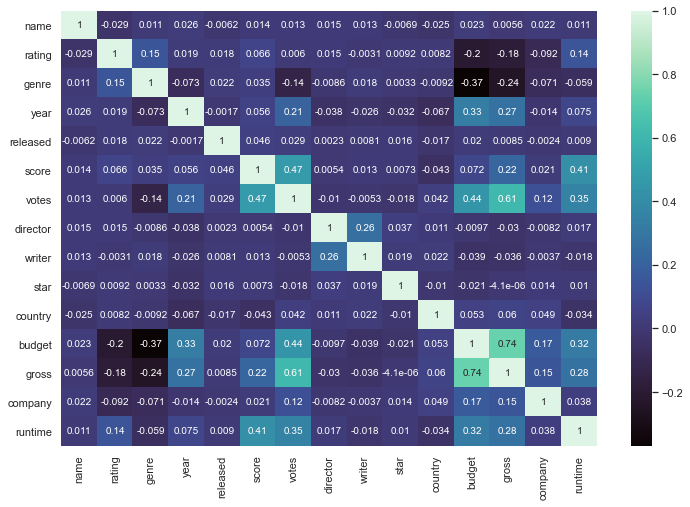

In [82]:
# start analysis
# create a correlation matrix and create heatmap
correlation_matrix = df_coded.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.rcParams['figure.figsize'] = [24, 16]

<AxesSubplot:>

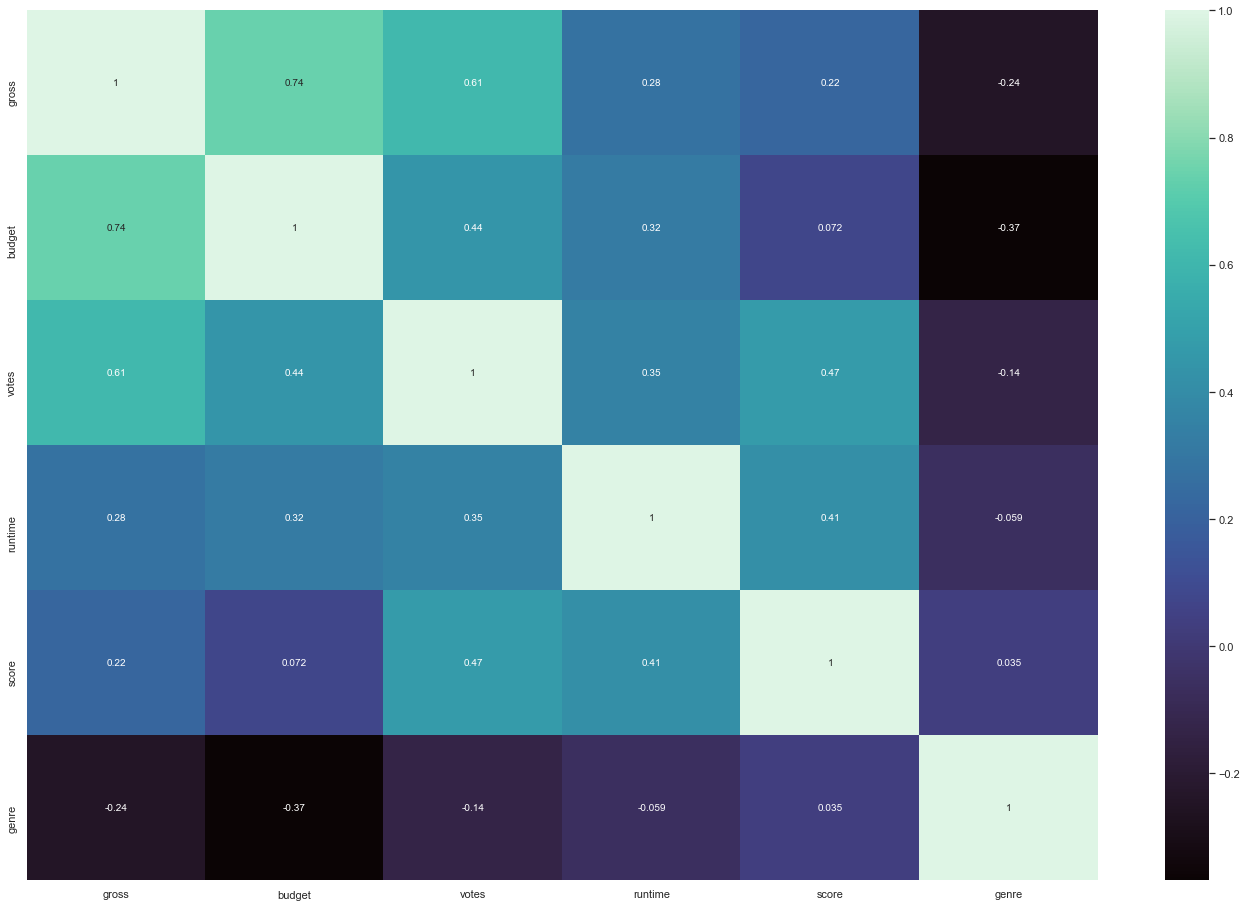

In [83]:
# reduce the heatmap to higher correlated features
correlation_matrix_reduced = df_coded[['gross', 'budget', 'votes', 'runtime', 'score', 'genre']].corr(method='pearson')
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='mako')

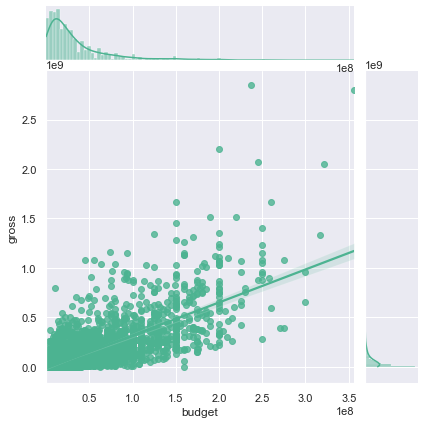

In [88]:
# look at some relationship more closely 
# budget and gross earnings
sns.jointplot(data=df_coded, x='budget', y='gross', kind='reg', color="#4CB391")

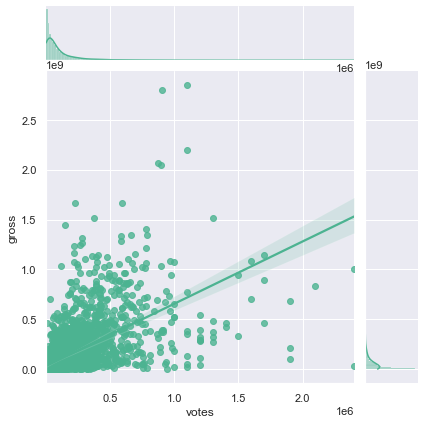

In [78]:
# look at some relationship more closely 
# votes and gross earnings
sns.jointplot(data=df_coded, x='votes', y='gross', kind='reg', color="#4CB391")

In [97]:
# linear regression model development
# define features
X = df_coded[['budget', 'votes', 'runtime', 'score', 'genre']]
# define target
y = df_coded['gross']
# define train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# instantiate an instance of the linear regression model
ln_reg_model = LinearRegression()
# train model
ln_reg_model.fit(X_train, y_train)
# show model coefficients
cdf = pd.DataFrame(ln_reg_model.coef_, X.columns, columns=['Coefficient'])
print(cdf)

          Coefficient
budget   2.671443e+00
votes    3.792152e+02
runtime -6.055161e+05
score    5.107875e+06
genre    1.292650e+06


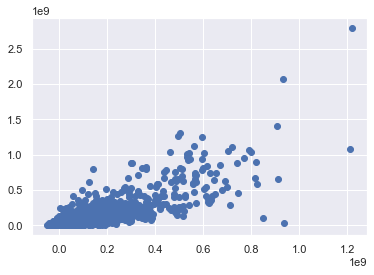

In [98]:
# test model
# use X_test data to see predicted yearly spend
predictions = ln_reg_model.predict(X_test)

# compare the predicted outputs with y_test
fig, ax = plt.subplots()
ax.scatter(predictions, y_test)

                 Test Type         Value
0      mean absolute error  6.069818e+07
1       mean squared error  1.287362e+16
2  root mean squared error  1.134620e+08


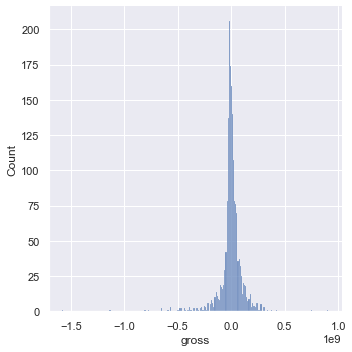

In [102]:
# evaluate the accuracy
# test the mean absolute error
mean_abs_error = metrics.mean_absolute_error(y_test, predictions)

# test the mean squared error
mean_squared_error = metrics.mean_squared_error(y_test, predictions)

# test the root mean squared error
mean_root_squared_error = np.sqrt(mean_squared_error)

accuracy_df = pd.DataFrame({'Test Type': ['mean absolute error', 'mean squared error', 'root mean squared error'],
                            'Value': [mean_abs_error, mean_squared_error, mean_root_squared_error]})

print(accuracy_df)

# test the residuals
residuals = predictions - y_test
sns.displot(residuals)
plt.savefig(r'./residuals_display.png', dpi=500, bbox_inches='tight')

In [121]:
# make individual predictions
columns = ['budget', 'votes', 'runtime', 'score', 'genre']

# predict the revenue for Sonic the Hedgehog
movie_one = df_adj[df_adj['name'] == 'Sonic the Hedgehog']
movie_one_adj = movie_one.copy()

for column in movie_one_adj.columns:
    if movie_one_adj[column].dtype == 'object':
        movie_one_adj[column] = movie_one_adj[column].astype('category')
        movie_one_adj[column] = movie_one_adj[column].cat.codes

X_movie_one = movie_one_adj[columns]
movie_one_revenue = ln_reg_model.predict(X_movie_one)
print('Revenue prediction for Sonic the Hedgehog: ' + str(movie_one_revenue[0]))
print('Actual revenue for Sonic the Hedgehog: ' + str(movie_one_adj['gross'].tolist()[0]))

print('-- -- -- --')
# predict the revenue for Bad Boys for Life
movie_two = df_adj[df_adj['name'] == 'Bad Boys for Life']
movie_two_adj = movie_two.copy()

for column in movie_two_adj.columns:
    if movie_two_adj[column].dtype == 'object':
        movie_two_adj[column] = movie_two_adj[column].astype('category')
        movie_two_adj[column] = movie_two_adj[column].cat.codes

X_movie_two = movie_two_adj[columns]
movie_two_revenue = ln_reg_model.predict(X_movie_two)
print('Revenue prediction for Sonic the Hedgehog: ' + str(movie_two_revenue[0]))
print('Actual revenue for Sonic the Hedgehog: ' + str(movie_two_adj['gross'].tolist()[0]))

Revenue prediction for Sonic the Hedgehog: 230304319.7982642
Actual revenue for Sonic the Hedgehog: 319715683.0
-- -- -- --
Revenue prediction for Sonic the Hedgehog: 243444597.4215774
Actual revenue for Sonic the Hedgehog: 426505244.0
